# SARIMA

Selain parameter (p,d,q) pada model ARIMA, SARIMA memiliki parameter tambahan yaitu (P,D,Q)m yang secara spesifik mendeskripsikan komponen musiman dari model.

---
In addition to the parameters (p, d, q) in the ARIMA model, SARIMA has additional parameters, namely (P, D, Q) m which specifically describe the seasonal component of the model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import SARIMAX model library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
# import library for ETS (Error Trend Seasonal) plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# import library for grid search model order
from pmdarima import auto_arima

In [20]:
# monthly plot to see seasonality
from statsmodels.graphics.tsaplots import month_plot

In [31]:
# library for model evaluation metrics
from statsmodels.tools.eval_measures import rmse, mse, meanabs

In [6]:
# import dataset
co2_df = pd.read_csv("UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv")

In [7]:
co2_df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
# prepare for the datetime index from the columns(1)
co2_df['date'] = pd.to_datetime({'year': co2_df['year'], 'month':co2_df['month'], 'day': 1})

# actually you can fill in 'day' with anything because this is monthly data, 
# only if it is filled with the end of the month there will be several options 28, 29, 30, 31

In [9]:
co2_df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [11]:
# prepare for the datetime index from the columns(2)
co2_df = co2_df.set_index('date')
co2_df.index.freq = 'MS'

In [12]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Freq: MS
Data columns (total 5 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [13]:
co2_df.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq='MS')

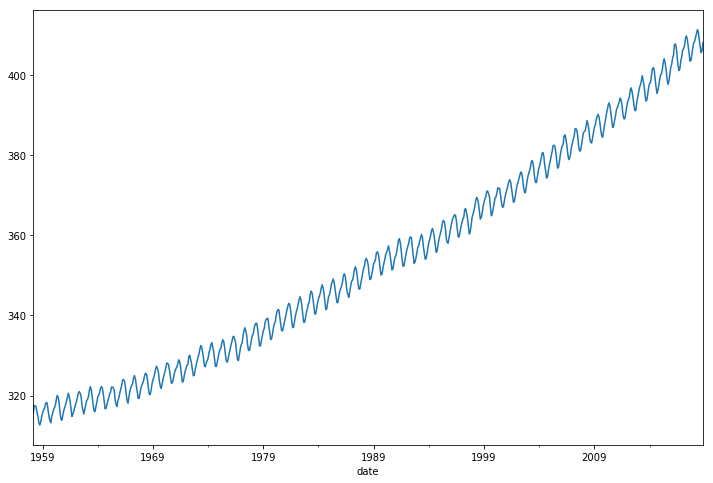

In [14]:
# plot time series data
co2_df['interpolated'].plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

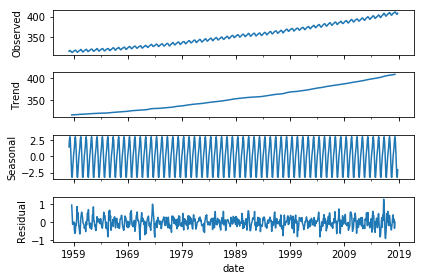

In [16]:
# ets plot
ets = seasonal_decompose(co2_df['interpolated'], model='add')
ets.plot();

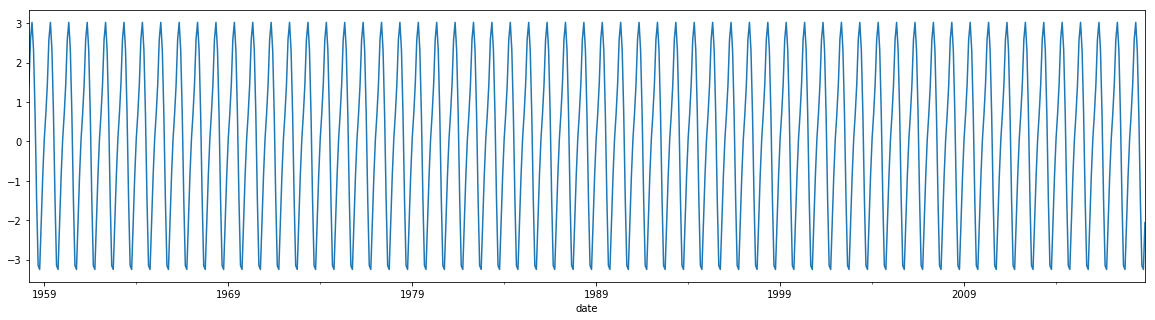

In [19]:
ets.seasonal.plot(figsize=(20, 5)).autoscale(axis='x', tight=True)

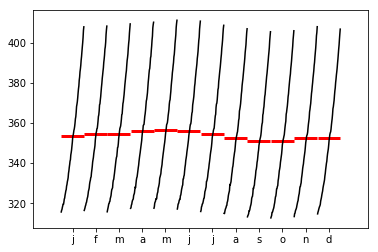

In [22]:
month_plot(co2_df['interpolated']);

In [23]:
# grid search model order
# m : int, optional (default=1)
#     The period for seasonal differencing, ``m`` refers to the number of
#     periods in each season. For example, ``m`` is 4 for quarterly data, 12
#     for monthly data, or 1 for annual (non-seasonal) data. Default is 1.
#     Note that if ``m`` == 1 (i.e., is non-seasonal), ``seasonal`` will be
#     set to False. For more information on setting this parameter, see
#     :ref:`period`.
auto_arima(co2_df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.449
Date:                            Wed, 27 Jan 2021   AIC                            424.898
Time:                                    19:59:13   BIC                            447.850
Sample:                                         0   HQIC                           433.754
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.986      0.324      -0.001       0.002
ma.L1         -0.3808      0.034    -11.210      0.000      -0.447      -0.314
ar.S.L12       0.9995      0.000   3168.496      0.000       0.999       1.000
ma.S.L12      -0.8642      0.021    -40.209      0.000      -0.906      -0.822
sigma2         0.0962      0.005     20.369      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       52.06   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
len(co2_df)

729

In [25]:
# trai test split
# test 12 month
train = co2_df.iloc[:717]
test = co2_df.iloc[717:]

In [26]:
# fit (train) model
model = SARIMAX(train['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
fitted_model = model.fit()

In [27]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Wed, 27 Jan 2021   AIC                            418.297
Time:                                    20:12:42   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.034    -10.854      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3189.398      0.000       0.999       1.000
ma.S.L12      -0.8647      0.023    -37.670      0.000      -0.910      -0.820
sigma2         0.0959      0.005     20.268      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.92   Jarque-Bera (JB):                 3.78
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# length of predictions
start = len(train)
end = len(train) + len(test) - 1

In [29]:
# let's predict
predictions = fitted_model.predict(start, end, typ='levels').rename("SARIMAX Predictions")

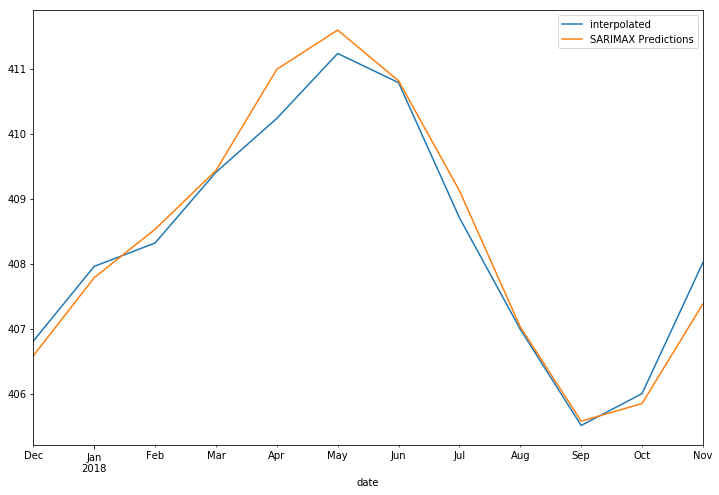

In [35]:
# plot the result (predictions)
test['interpolated'].plot(figsize=(12, 8), legend=True).autoscale(axis='x', tight=True)
predictions.plot(legend=True)

In [32]:
# evaluate predictions result
rmse(test['interpolated'], predictions)

0.34626464366078397

In [33]:
test['interpolated'].mean()

408.3333333333333

In [34]:
predictions.mean()

408.3925230662921

In [36]:
# let's forecast to the future (1)
model_f = SARIMAX(co2_df['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
fitted_model_f = model_f.fit()

In [37]:
# let's forecast to the future (2)
fitted_model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.445
Date:                            Wed, 27 Jan 2021   AIC                            426.890
Time:                                    20:33:16   BIC                            445.252
Sample:                                03-01-1958   HQIC                           433.975
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3715      0.034    -10.874      0.000      -0.438      -0.305
ar.S.L12       0.9997      0.000   3226.594      0.000       0.999       1.000
ma.S.L12      -0.8655      0.022    -40.081      0.000      -0.908      -0.823
sigma2         0.0963      0.005     20.356      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       51.06   Jarque-Bera (JB):                 3.75
Prob(Q):                              0.11   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# let's forecast into the unknown future (3)
fcast = fitted_model_f.predict(start=len(co2_df), end=len(co2_df)+11, typ='levels').rename("SARIMAX Forecast")

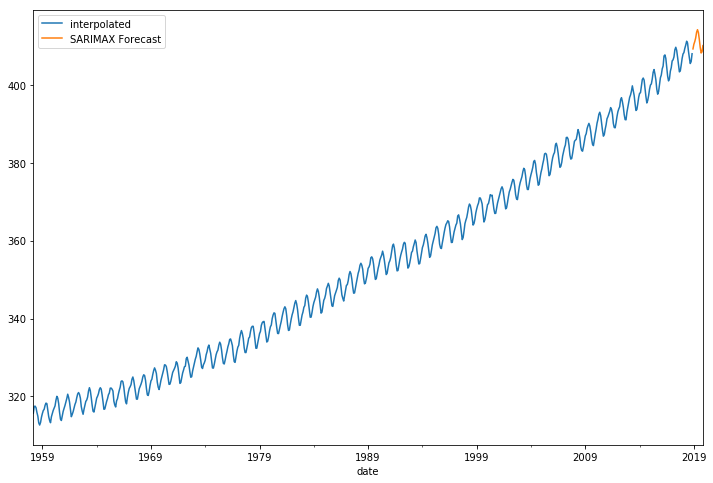

In [40]:
# plot the result (forecast)
co2_df['interpolated'].plot(figsize=(12, 8), legend=True).autoscale(axis='x', tight=True)
fcast.plot(legend=True)

# SARIMAX

SARIMA dimplementasikan dengan ```SARIMAX``` dari statsmodels. "X" memiliki arti bahwa fungsi tersebut mendukung variabel regressor exogenous.

---
SARIMA is implemented with ```SARIMAX``` from statsmodels. "X" means that the function supports exogenous regressor variables.

In [41]:
# import dataset for this part
restaurant_df = pd.read_csv("UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv",
                            index_col='date',
                            parse_dates=True)

restaurant_df.index.freq = 'D'

In [42]:
restaurant_df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [43]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Freq: D
Data columns (total 8 columns):
weekday         517 non-null object
holiday         517 non-null int64
holiday_name    517 non-null object
rest1           478 non-null float64
rest2           478 non-null float64
rest3           478 non-null float64
rest4           478 non-null float64
total           478 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [44]:
restaurant_df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [46]:
# drop rows with missing values, 39 last rows
restaurant_df1 = restaurant_df.dropna()

In [47]:
restaurant_df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [48]:
restaurant_df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [49]:
columns = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in columns:
    restaurant_df1[col] = restaurant_df1[col].astype(int)

In [50]:
restaurant_df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


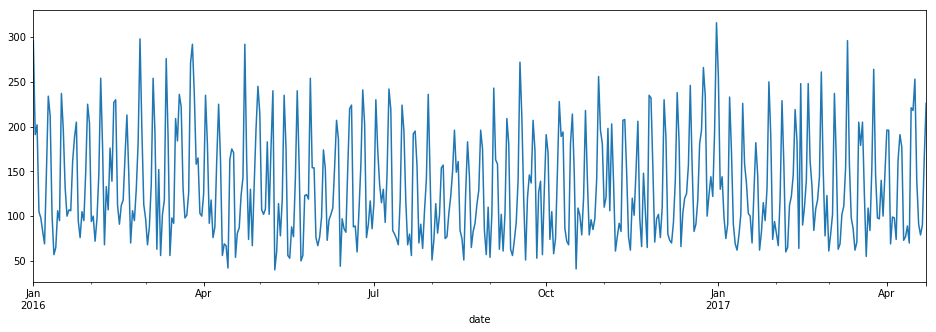

In [51]:
restaurant_df1['total'].plot(figsize=(16, 5)).autoscale(axis='x', tight=True)

In [52]:
restaurant_df1[restaurant_df1['holiday']==1].index
# restaurant_df1.query('holiday==1').index
# the same result

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

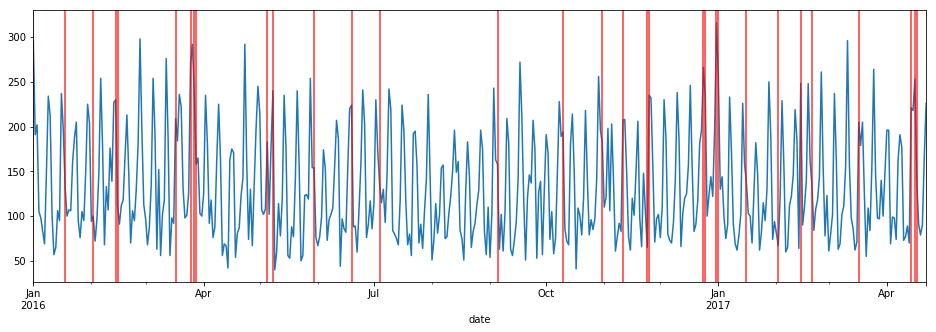

In [58]:
ax = restaurant_df1['total'].plot(figsize=(16, 5))

for day in restaurant_df1[restaurant_df1['holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)
    
ax.autoscale(axis='x', tight=True)

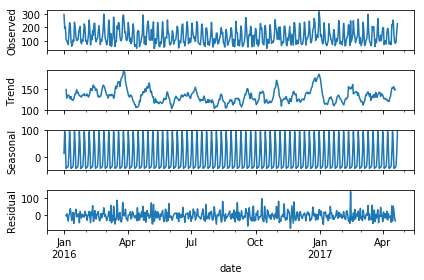

In [59]:
ets_restaurant = seasonal_decompose(restaurant_df1['total'])
ets_restaurant.plot();

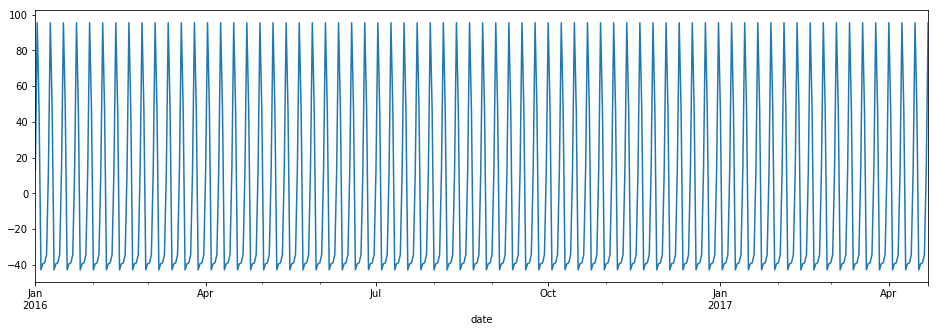

In [61]:
ets_restaurant.seasonal.plot(figsize=(16, 5)).autoscale(axis='x', tight=True)

Terlihat bahwa terdapat musiman yang kuat yang memiliki siklus mingguan.

---
It appears that there is a strong seasonality which has a weekly cycle.

### to be continued